# **Predicting Housing Prices in Ho Chi Minh City**

### **Situation**
***
Ho Chi Minh City has been a renowned metropolis for high and unstable housing prices over the years. This situation at times makes it hard for real estate buyers and sellers to navigate the market, especially when the world is experiencing uncertain and fluctuated economic conditions.

### **Objective**
***
*Our project is dedicated to constructing a predictive model to accurately predict housing prices in Ho Chi Minh City. This model holds profound significance, as it not only offers accurate price predictions but also explains the importance of the factors that influence these price dynamics. This knowledge empowers prospective buyers, sellers, and investors, to make better informed decisions and to participate in the market more effectively.*

### **Process**
***
This project will be divided into the following parts for clearer understanding:

*   **Data Collection:** Crawl data from Nha Tot, https://www.nhatot.com/mua-ban-nha-dat-tp-ho-chi-minh - a reliable house trading online marketplace - a key data source for our project;
*   **Data Preprocessing:** Clean and prepare the data, addressing missing values and outliers;
*   **Data Visualization:** Create informative visuals to reveal patterns and insights, especially into the influence of each determined factors on the market;
*   **Multiple Linear Regression:** Utilize this method to establish a predictive model that will allow us to model the relationships between independent variables and housing prices in a linear manner;
*   **Random Forest:** for enhanced predictive accuracy, that captures complex non-linear relationships in the data and can provide more accurate predictions.
*   **Comparison:** Compare the results of the aforementioned models to evaluate their performance. This comparison will help us understand which model is better suited for predicting housing prices in Ho Chi Minh City and provide insights into the factors that drive these predictions.

Our variables include:
*   Price
*   District
*   Number of Floors
*   Number of Bedrooms
*   Documents Status
*   Housing Types
*   Squared Meter Area
*   Price Per Squared Meter







# Crawling data from Nha Tot

https://colab.research.google.com/drive/1Q9kQFoChkIeytz20DgIKw3XS_AgHTMeH

# **Question 1: Processing the Data**
***
*This dataset needs to be translated into English for the purpose of this project's report. We also need to rename columns and save new dataset to a csv file.*

In [ ]:
import pandas as pd

# Read data
df = pd.read_csv('data.csv')

# Translate into English
labels_mapping = {
    'Giá nhà': 'Price',
    'Địa chỉ': 'Address',
    'Diện tích': 'Squared_meter_area',
    'Số phòng ngủ': 'Bedrooms',
    'Tổng số tầng': 'Floors',
    'Loại hình nhà ở': 'Housing_type',
    'Giấy tờ pháp lý': 'Documents',
    'url': 'url'
}

# Rename the columns
df.rename(columns=labels_mapping, inplace=True)
# Save new dataset
df.to_csv('data_clean.csv', index=False, encoding='utf-8-sig')

print("Xử lý hoàn thành. Dữ liệu đã được ghi vào tệp clean.csv.")

Xử lý hoàn thành. Dữ liệu đã được ghi vào tệp clean.csv.


## **Clean the Data**

*The purpose of this code is to prepare a dataset related to housing in Ho Chi Minh City for analysis. It standardizes data formats, corrects units in the 'Price' and 'Squared_meter_area' columns, splits location details, standardizes district names, handles missing values, refines room counts, and replaces null values. The goal is to ensure data accuracy and consistency, making it suitable for meaningful analysis and modeling.*

In [ ]:
import pandas as pd
import re
import math
df = pd.read_csv('data_clean.csv')
df['Address']= df['Address'].apply(lambda x: x.replace(', ',' ',1) if len(x.split(', '))==5 else x)

# Function to change price from million to billion
def chuyen_doi_gia_nha(gia_nha):
    if 'triệu' in gia_nha:
        gia_trieu = float(gia_nha.replace(' triệu', '').replace(',', '.')) / 1000
        return gia_trieu
    elif 'tỷ' in gia_nha:
        return float(gia_nha.replace(' tỷ', '').replace(',', '.'))
    else:
        return None
def xu_ly_dien_tich(dien_tich):
    return float(dien_tich.replace(' m²', ''))

# Apply above function into "Price" column
df['Price'] = df['Price'].apply(chuyen_doi_gia_nha)
df=df.rename(columns={"Price":"Price (billion)"})

# Change squared meter area into numerical data
df['Squared_meter_area'] = df['Squared_meter_area'].apply(xu_ly_dien_tich)
df=df.rename(columns={"Squared_meter_area":"Squared_meter_area (m2)"})

# Split the address into Ward, District, Address
df['Ward'] = df['Address'].apply(lambda x: x.split(', ')[1])
df['District'] = df['Address'].apply(lambda x: x.split(', ')[2])
df['Address'] = df['Address'].apply(lambda x: x.split(', ')[0])
df['District'] = df['District'].str.strip().str.lower()

# Replace 'Bình Tân' into 'Quận Bình Tân' in 'District' column
df['District'] = df['District'].replace(to_replace='Bình Tân', value='Quận Bình Tân', regex=True)
df['District'] = df['District'].replace(to_replace='quận bình tân', value='Quận Bình Tân', regex=True)
df['District'] = df['District'].replace(to_replace='bình tân', value='Quận Bình Tân', regex=True)
df['District'] = df['District'].replace(to_replace='quận Tân Phú', value='Quận Tân Phú', regex=True)
# Replace "nhà bè" into "huyện nhà bè"
df['District'] = df['District'].replace(to_replace='huyện nhà bè', value='nhà bè', regex=True)
df['District'] = df['District'].replace(to_replace='nhà bè', value='huyện nhà bè', regex=True)
# Delete index contains 'Thành phố Hồ Chí Minh' in 'District' column
df['District'] = df['District'].replace(to_replace='Thành phố Hồ Chí Minh', value='', regex=True)
df['District'] = df['District'].replace(to_replace='thành phố hồ chí minh', value='', regex=True)
df['District'] = df['District'].replace(to_replace='Tp Hồ Chí Minh', value='', regex=True)
df['District'] = df['District'].replace(to_replace='tp hồ chí minh', value='', regex=True)

# Reorder columns
df=df.reindex(columns=['Price (billion)',
 'Address',
 'Ward',
 'District',
 'Squared_meter_area (m2)',
 'Bedrooms',
 'Floors',
 'Housing_type',
 'Documents',
 'url'
 ])

# Calculate mean of "Floors"
mean_floor = math.ceil(round(df['Floors'].dropna().astype(float).mean(), 2))

# Fill "Floors" NA
df['Floors'].fillna(mean_floor, inplace=True)

# Delete rows that have "Floors >10"
df = df[df['Floors'] <= 10]

# Change number of rooms
def chuyen_doi_so_phong(gia_tri):
    if "nhiều hơn 10 phòng" in gia_tri:
        return 12
    else:
        # Use regular expression to extract number of rooms
        so_phong = re.search(r'\d+', gia_tri)
        if so_phong:
            return int(so_phong.group())  # Return to integer if number is found
        else:
            return None  # Return to None if no number is found

df['Bedrooms'] = df['Bedrooms'].apply(lambda x: chuyen_doi_so_phong(x))
df['Bedrooms'] = df['Bedrooms'].apply(lambda x: 12 if x and x > 10 else x)
df=df.rename(columns={"Bedrooms":"Bedrooms(room)"})

# Replace null value in "Documents" with "Đang chờ sổ"
df['Documents'] = df['Documents'].mask(df['Documents'].isnull(), 'Đang chờ sổ')

# Drop nulll value in "Housing_type"
df.dropna(subset=['Housing_type'], inplace=True)
print(df.head())

df.to_csv('data_clean.csv', index=False, encoding='utf-8-sig')
print("Xử lý hoàn thành. Dữ liệu đã được ghi vào tệp data_clean.csv")


   Price (billion)                 Address                              Ward  \
0            7.490  17 Đường Liên Khu 8-9            Phường Bình Hưng Hoà A    
1            5.400           Đường Tô Hiệu                   Phường Hiệp Tân   
2           11.500             Nguyễn Xiển  Phường Long Thạnh Mỹ (Quận 9 cũ)   
3            0.315             Đường An Hạ                   Xã Phạm Văn Hai   
4            6.280             Hà Huy Giáp                  Phường Thạnh Lộc   

            District  Squared_meter_area (m2)  Bedrooms(room)  Floors  \
0      Quận Bình Tân                     80.0               3     1.0   
1       quận tân phú                     75.0               3     2.0   
2  thành phố thủ đức                     84.0               5     3.0   
3   huyện bình chánh                    100.0               2     1.0   
4            quận 12                     98.0               3     3.0   

            Housing_type    Documents  \
0  Nhà mặt phố, mặt tiền     Đã có sổ  

## **Standardize the Data**
*This part aims to standardize specific columns in a dataset by scaling them to have a mean of 0 and a standard deviation of 1. The purpose is to make these variables comparable, running model and apply machine learning faster and easier as well as prepare them for analysis. It then visualizes the data distribution before and after standardization using histograms to highlight the impact of the standardization process.*

   Price (billion)                 Address                              Ward  \
0         0.052509  17 Đường Liên Khu 8-9            Phường Bình Hưng Hoà A    
1        -0.127684           Đường Tô Hiệu                   Phường Hiệp Tân   
2         0.398238             Nguyễn Xiển  Phường Long Thạnh Mỹ (Quận 9 cũ)   
3        -0.566097             Đường An Hạ                   Xã Phạm Văn Hai   
4        -0.051813             Hà Huy Giáp                  Phường Thạnh Lộc   

            District  Squared_meter_area (m2)  Bedrooms(room)    Floors  \
0      Quận Bình Tân                 0.057297       -0.244570 -1.623123   
1       quận tân phú                -0.001921       -0.244570 -0.671171   
2  thành phố thủ đức                 0.104672        0.763099  0.280781   
3   huyện bình chánh                 0.294170       -0.748404 -1.623123   
4            quận 12                 0.270483       -0.244570  0.280781   

            Housing_type    Documents  \
0  Nhà mặt phố, mặt tiền   

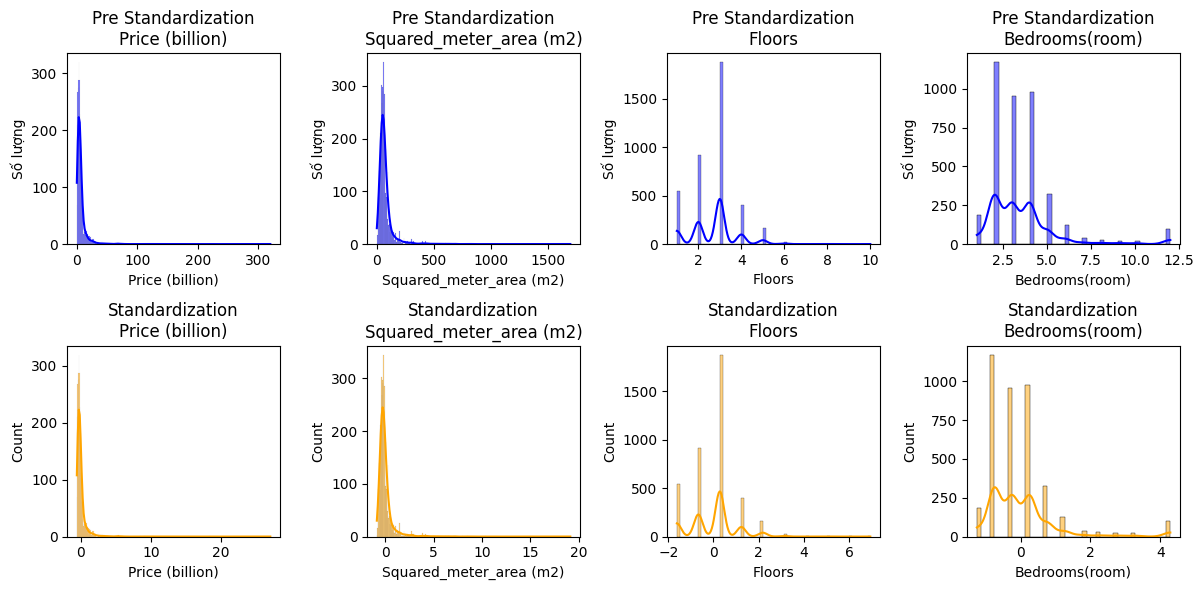

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data_clean.csv')

def standardize_data(df, columns_to_standardize):
    df_standardized = df.copy()
    for column in columns_to_standardize:
        mean = df[column].mean()
        std = df[column].std()
        df_standardized[column] = (df[column] - mean) / std
    return df_standardized

# Columns needs to be standardized
columns_to_standardize = ['Price (billion)', 'Squared_meter_area (m2)', 'Floors', 'Bedrooms(room)']

# Standardizing
df_standardized = standardize_data(df, columns_to_standardize)
print(df_standardized.head())
# Plot graph before standardized
plt.figure(figsize=(15, 6))
for i, column in enumerate(columns_to_standardize):
    plt.subplot(2, 5, i + 1)
    sns.histplot(df[column], color='blue', kde=True)
    plt.title(f'Pre Standardization\n{column}')
    plt.xlabel(column)
    plt.ylabel('Số lượng')

# Plot graph after standardized
for i, column in enumerate(columns_to_standardize):
    plt.subplot(2, 5, i + 6)
    sns.histplot(df_standardized[column], color='orange', kde=True)
    plt.title(f'Standardization\n{column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


As we can see, standardization doesn't change the data trends.

### **Data Visualization**

In [ ]:
#Remove Outliers of Price
import pandas as pd
import numpy as np

def remove_outlier_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
df = pd.read_csv('data_clean.csv')

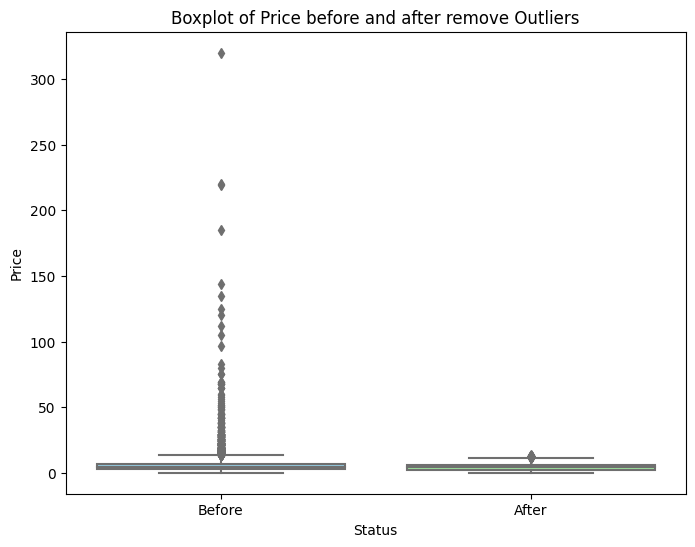

Number of rows before removing outliers: 3943
Number of rows after removing outliers: 3569
Skewness of 'Price' before: 11.86522015973517
Skewness of biến 'Price' after: 0.7915968743991675


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew


# Numbers of value before remove 'Price' outliers
num_rows_before = len(df)
# Skewness of 'Price' before remove outliers
skewness_before = skew(df['Price (billion)'])

# Remove outliers in 'Price' using remove_outlier_IQR function above
df_no_outliers = remove_outlier_IQR(df, 'Price (billion)')

# Numbers of value after remove 'Price' outliers
num_rows_after = len(df_no_outliers)
# Skewness of 'Price' after remove outliers
skewness_after = skew(df_no_outliers['Price (billion)'])

# Plot before and after boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=[df['Price (billion)'], df_no_outliers['Price (billion)']], palette=['skyblue', 'lightgreen'])
plt.xticks([0, 1], ['Before', 'After'])
plt.title('Boxplot of Price before and after remove Outliers')
plt.ylabel('Price')
plt.xlabel('Status')
plt.show()

print("Number of rows before removing outliers:", num_rows_before)
print("Number of rows after removing outliers:", num_rows_after)
print("Skewness of 'Price' before:", skewness_before)
print("Skewness of biến 'Price' after:", skewness_after)


Before removing outliers, the Skewness of "Price" is very high at 11.87. After removing outliers, we meet a skewness of 0.79, nearly a normal distribution, which meets our expectation.

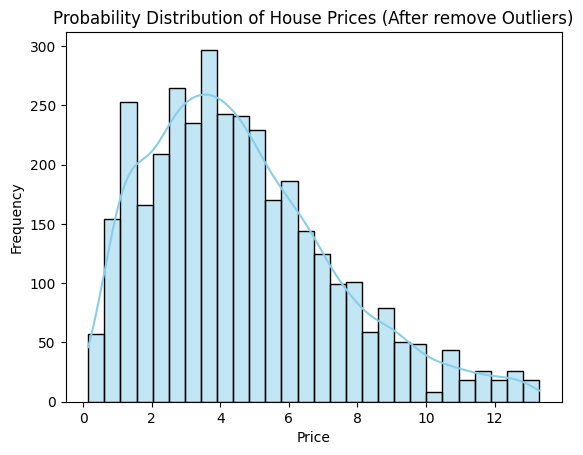

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew


# Plot probability distribution of Price after removing outliers
sns.histplot(df_no_outliers['Price (billion)'], kde=True, color='skyblue')
plt.title('Probability Distribution of House Prices (After remove Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**Comment**

The probability distribution chart of house prices, post-outlier removal, exhibits a skewness of 0.79. The majority of data points are concentrated within the 2 to 6 billion VNĐ range. This distribution displays a less leftward skew.

In [ ]:
df_no_outliers.describe()

,Price (billion),Squared_meter_area (m2),Bedrooms(room),Floors
count,3569.000000,3569.000000,3569.000000,3569.000000
mean,4.614369,63.498529,3.212384,2.633231
std,2.712402,54.860245,1.567342,0.985730
min,0.150000,1.000000,1.000000,1.000000
25%,2.590000,40.000000,2.000000,2.000000
50%,4.200000,56.000000,3.000000,3.000000
75%,6.200000,72.000000,4.000000,3.000000
max,13.300000,1493.800000,12.000000,7.000000


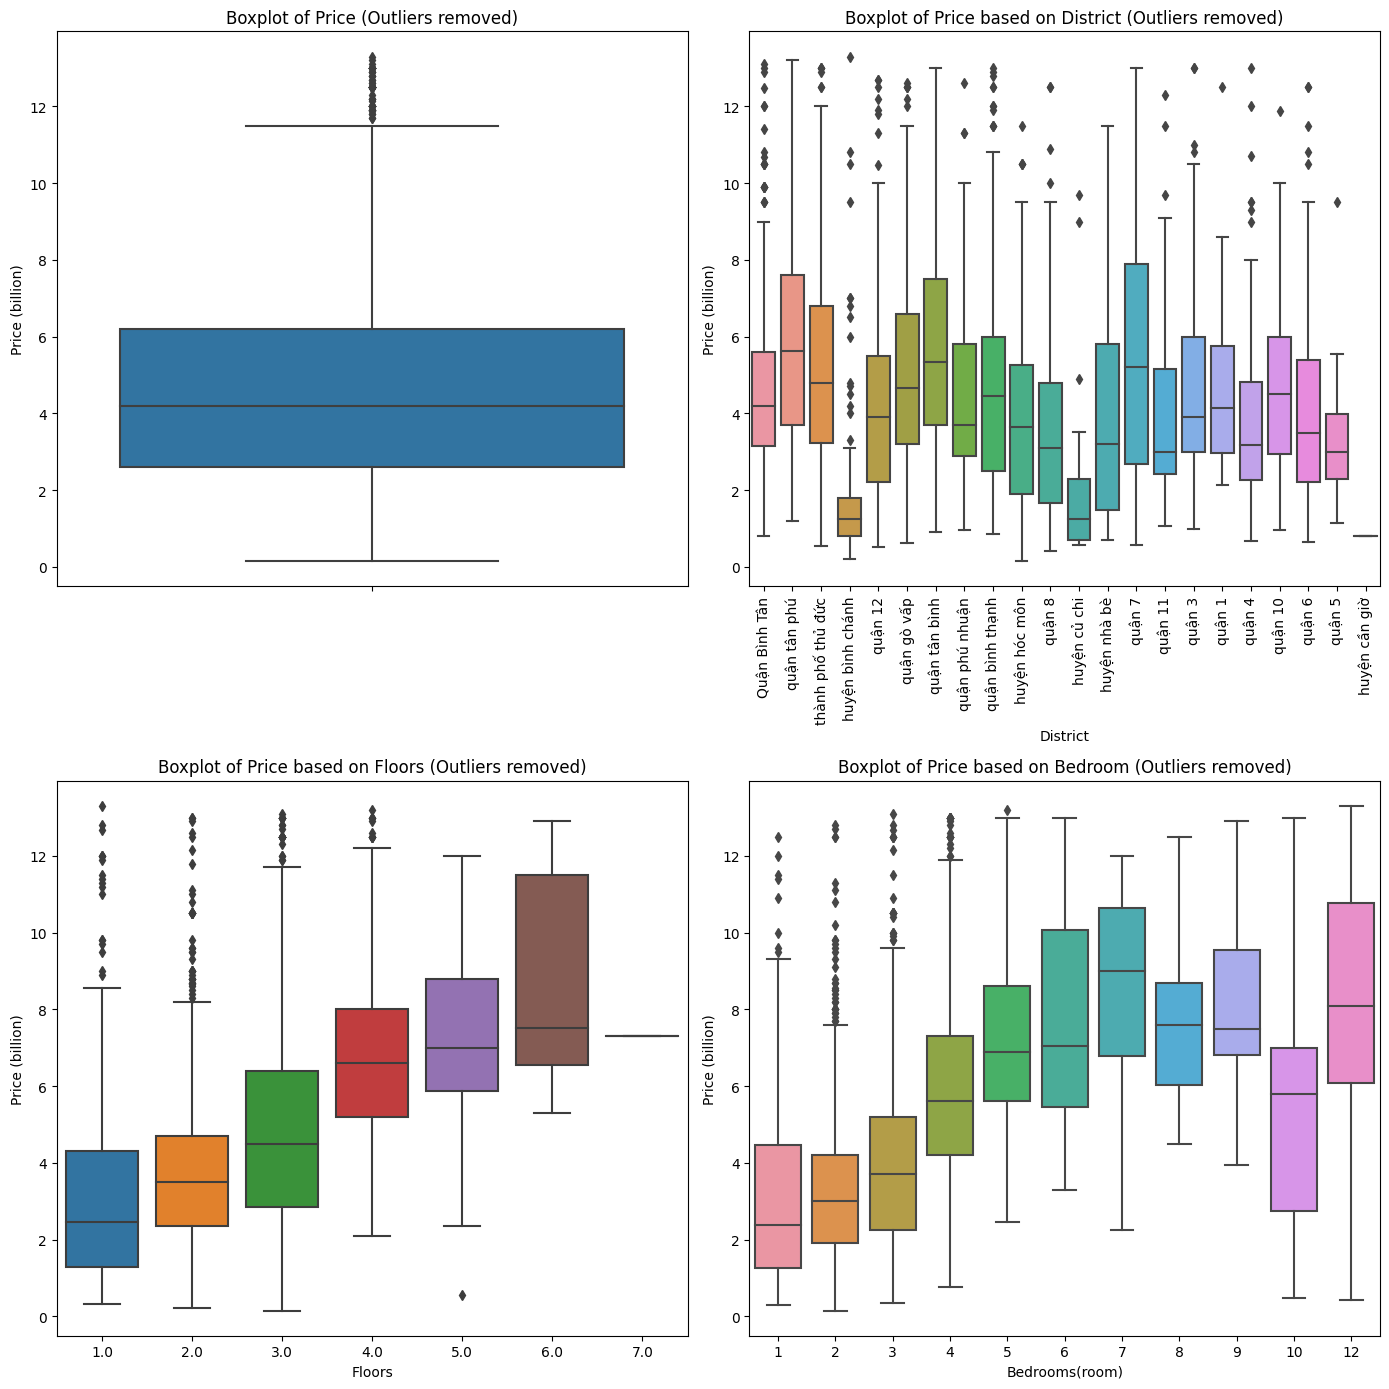

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a subplot
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.flatten()

# Plot 'Price' boxplot after removing outlier
sns.boxplot(y='Price (billion)', data=df_no_outliers, ax=axes[0])
axes[0].set_title('Boxplot of Price (Outliers removed)')

# Plot 'Price based on District' boxplot after removing outlier
sns.boxplot(x='District', y='Price (billion)', data=df_no_outliers, ax=axes[1])
axes[1].set_title('Boxplot of Price based on District (Outliers removed)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

# Plot 'Price based on Floors' boxplot after removing outlier
sns.boxplot(x='Floors', y='Price (billion)', data=df_no_outliers, ax=axes[2])
axes[2].set_title('Boxplot of Price based on Floors (Outliers removed)')

# Plot 'Price based on Bedroom' boxplot after removing outlier
sns.boxplot(x='Bedrooms(room)', y='Price (billion)', data=df_no_outliers, ax=axes[3])
axes[3].set_title('Boxplot of Price based on Bedroom (Outliers removed)')

plt.tight_layout()
plt.show()

**Comment**

Examining the box plots reveals a notable density of data points within the price range of 2.5 to 6.2 billion Vietnamese Đồng (VNĐ). Specifically, Tân Phú, Tân Bình, and District 7 exhibit higher housing prices, while Bình Chánh and Củ Chi display lower price ranges. In the context of the third and fourth box plots, it becomes apparent that an increase in the number of floors and bedrooms generally correlates with higher housing prices. Nevertheless, a decline in price is observable when housing listings feature an excessive number of bedrooms (ranging from 8 to 12), resulting in more price fluctuations.

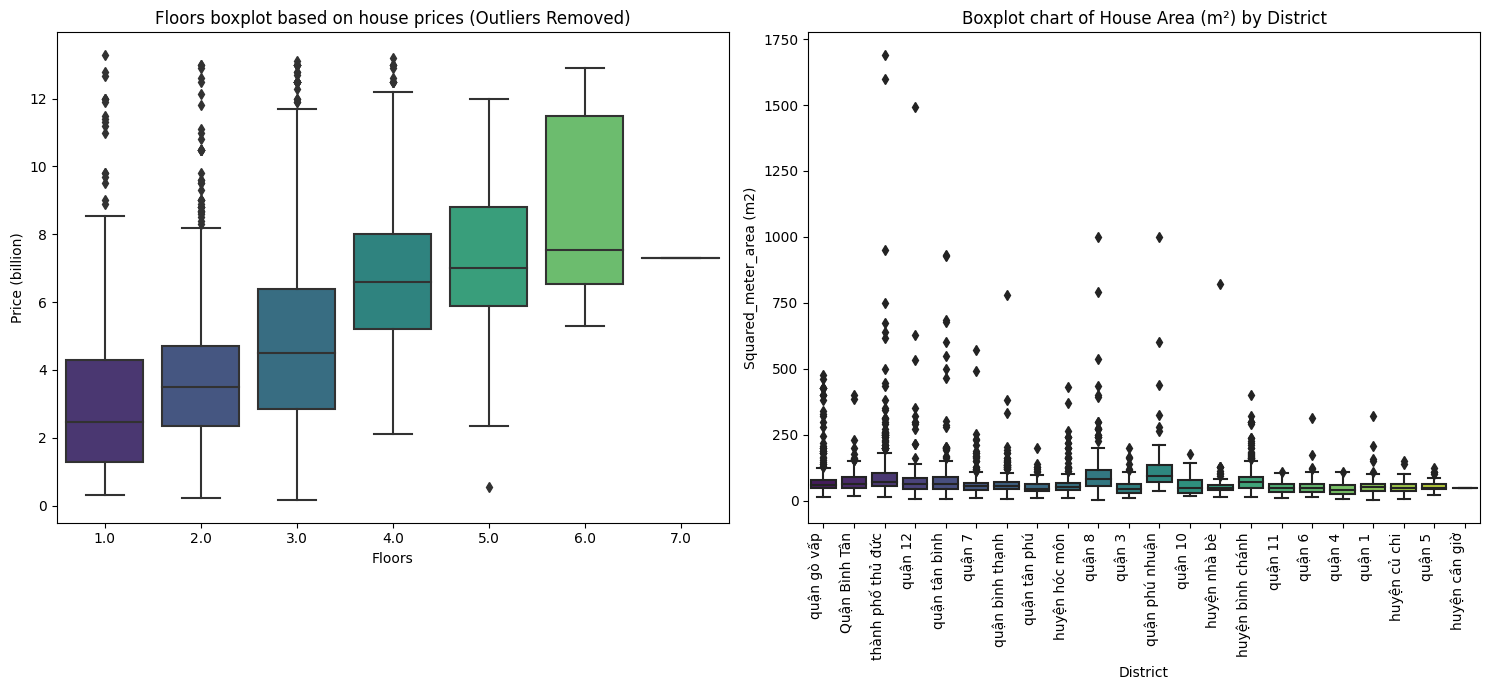

In [ ]:
# Count number of Districts in the dataset
quans_count = df['District'].value_counts()

# Create a subplot
f, axes=plt.subplots(1,2,figsize=(15,7))

# Plot 'Price based on Floors' boxplot after removing outlier
sns.boxplot(x='Floors', y='Price (billion)', data=df_no_outliers, palette='viridis', ax=axes[0])
axes[0].set_title('Floors boxplot based on house prices (Outliers Removed)')
axes[0].set_xlabel('Floors')
axes[0].set_ylabel('Price (billion)')

# Plot 'Squared meter area based on District"
sns.boxplot(x='District', y='Squared_meter_area (m2)', data=df, palette='viridis', ax=axes[1])
axes[1].set_title('Boxplot chart of House Area (m²) by District')
axes[1].set_xlabel('District')
axes[1].set_ylabel('Squared_meter_area (m2)')
axes[1].set_xticklabels(quans_count.index.tolist(), rotation=90, ha='right')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Comment**

The first plot, which explores the impact of the number of floors on house prices post-outlier removal, reveals a positive correlation, indicating that as the number of floors increases, housing prices tend to rise.

In the second plot, depicting the distribution of house areas (in square meters) by district, a distinctive pattern emerges. While the average house area remains consistent across all districts, the presence of outliers varies significantly. Notably, larger districts, such as Thủ Đức, District 12, Tân Bình, District 8, and Phú Nhuận District, exhibit a higher number of outliers, some of which extend to remarkably large areas, such as 1750 square meters. This is indicative of considerable variation in property sizes within these areas. Gò Vấp, on the other hand, displays numerous outliers primarily within the range of approximately 350 to 500 square meters, a reflection of this district's denser population and constrained spatial availability, which contributes to a narrower range of property sizes.

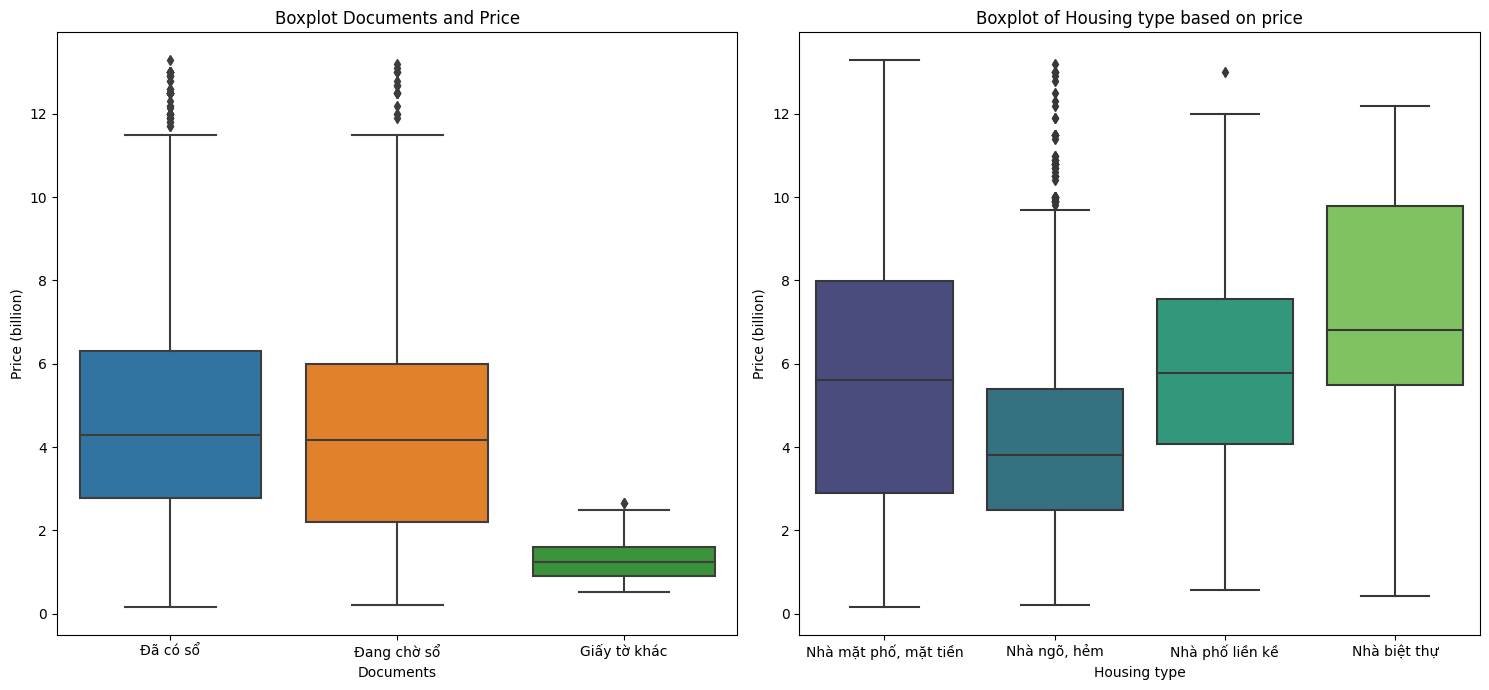

In [ ]:
# Create a subplot
f, axes = plt.subplots(1, 2, figsize=(15, 7))

# Plot boxplot of "Price based on Documents"
sns.boxplot(x='Documents', y='Price (billion)', data=df_no_outliers, order=['Đã có sổ', 'Đang chờ sổ', 'Giấy tờ khác'], ax=axes[0])
axes[0].set_title('Boxplot Documents and Price')
axes[0].set_xlabel('Documents')
axes[0].set_ylabel('Price (billion)')

# Plot Plot boxplot of "Price based on House type"
sns.boxplot(x='Housing_type', y='Price (billion)', data=df_no_outliers, palette='viridis', ax=axes[1])
axes[1].set_title('Boxplot of Housing type based on price')
axes[1].set_xlabel('Housing type')
axes[1].set_ylabel('Price (billion)')

plt.tight_layout()
plt.show()

**Comment**

Properties with documents available exhibit slightly higher prices when compared to those waiting documents, although the difference is relatively small (around 0.2 billion VNĐ). Additionally, an examination of different property types, such as "Nhà Biệt Thự" and "Nhà mặt phố, mặt tiền," consistently exhibits higher prices than "Nhà phố liền kề" and "Nhà ngõ, hẻm." It is worth noting that the category "Nhà ngõ, hẻm" presents a high number of outliers, implying potential variations within this specific housing type.

In [ ]:
# Calculate Price per area
df_no_outliers['Price_per_area (billion)'] = df_no_outliers['Price (billion)'] / df_no_outliers['Squared_meter_area (m2)']
df_no_outliers.to_csv('data_clean.csv', index=False, encoding='utf-8-sig')
print("Xử lý hoàn thành. Dữ liệu đã được ghi vào tệp data_clean.csv")

Xử lý hoàn thành. Dữ liệu đã được ghi vào tệp data_clean.csv


<ipython-input-11-4c5c77d5998f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Price_per_area (billion)'] = df_no_outliers['Price (billion)'] / df_no_outliers['Squared_meter_area (m2)']


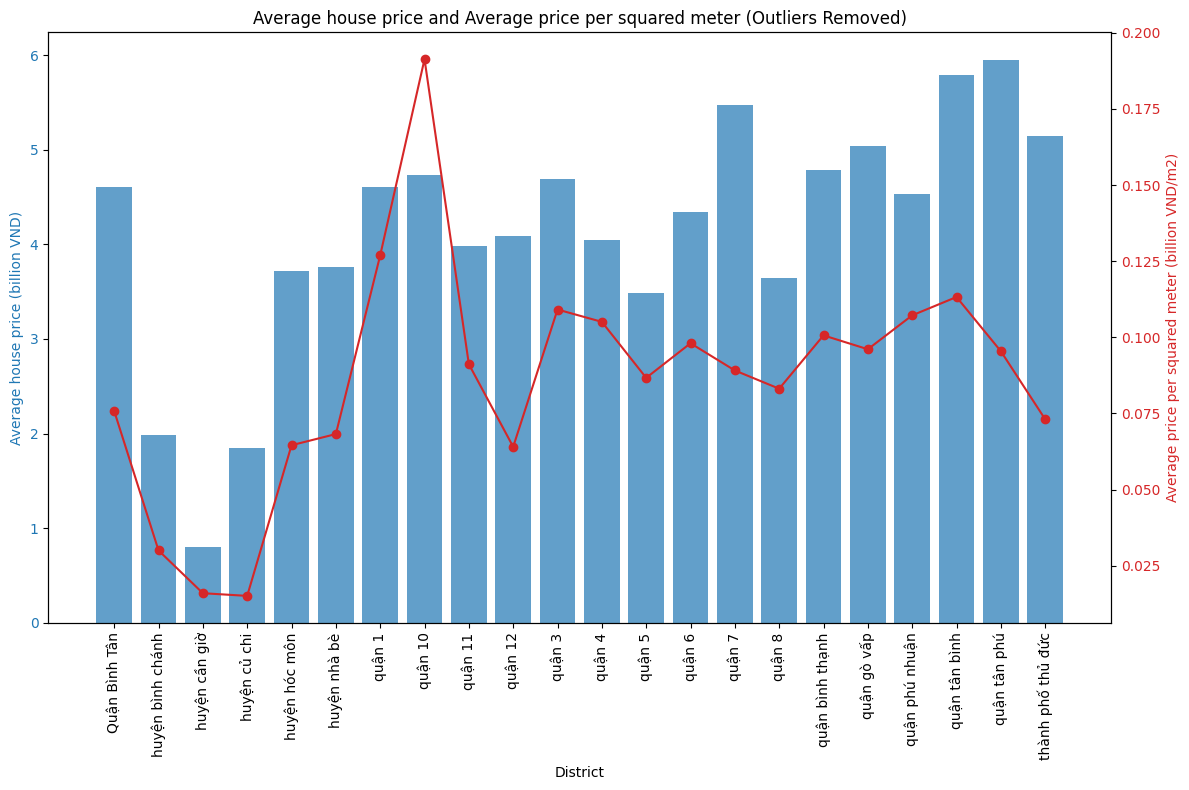

In [ ]:
# Calculate average price and average price per area based on District
average_price_by_district = df_no_outliers.groupby('District')[['Price (billion)', 'Price_per_area (billion)']].mean()

# Plot a mixed graph: bar Average price, line: average price per area)
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bargprah
ax1.set_xlabel('District')
ax1.set_ylabel('Average house price (billion VND)', color='tab:blue')
ax1.bar(average_price_by_district.index, average_price_by_district['Price (billion)'], color='tab:blue', alpha=0.7)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.tick_params(axis='x', rotation=90)

# Create twin axes to plot linegraph
ax2 = ax1.twinx()
ax2.set_ylabel('Average price per squared meter (billion VND/m2)', color='tab:red')
ax2.plot(average_price_by_district.index, average_price_by_district['Price_per_area (billion)'], color='tab:red', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Average house price and Average price per squared meter (Outliers Removed)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Comment**

At first glance, we can observe that Tân Phú District, Tân Bình District, Nhà Bè District, District 7, and Thủ Đức city are the top 5 areas that have the highest average housing price, with the highest reaching almost 6 billion VNĐ. Meanwhile, Cần Giờ, Bình Chánh, and Củ Chi all have the lowest average housing price at around under 2 billion VNĐ.

The average housing price per square meter witnesses a peak at the data in District 10, rising to almost 0,2 billion per square meter, followed by the average price of around 0,1 to 0,125 billion VNĐ by other districts. The districts with the lowest average housing price per square meter are also Bình Chánh, Cần Giờ, and Củ Chi with the data as low as 0,025 billion per square meter.

The high average housing price per square meter for houses on-sale in District 10 can be explained by the fast-growing demand in the area. This is due to the tendency of people moving away from central area because of the excessively high prices. Moreover, the houses on-sale in District 1 have moderate average price because most of them are located in alleys. They big houses in this area are mainly rented for business-related purposes.

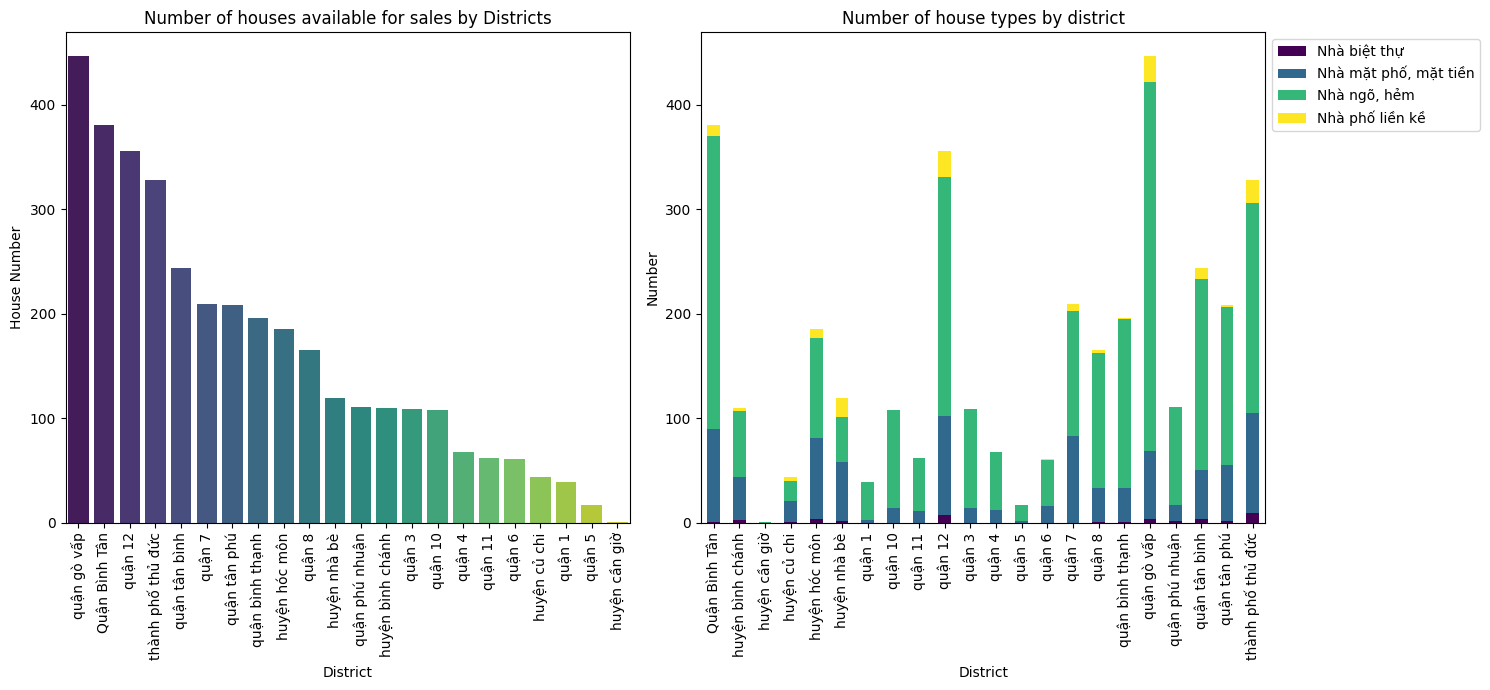

In [ ]:
df= pd.read_csv('data_clean.csv')
# Create a subplot
f, axes = plt.subplots(1, 2, figsize=(15, 7))
# Plot stacked bargraph illustrates house type  based on district
house_type_counts = df.groupby(['District', 'Housing_type']).size().unstack(fill_value=0)
house_type_counts.plot(kind='bar', stacked=True, colormap='viridis',ax=axes[1]).legend(bbox_to_anchor=(1, 1))
axes[1].set_title('Number of house types by district')
axes[1].set_xlabel('District')
axes[1].set_ylabel('Number')

# Plot houses available for sales graph
quans_count = df['District'].value_counts()
sns.barplot(x=quans_count.index, y=quans_count, palette='viridis',ax=axes[0])
axes[0].set_title('Number of houses available for sales by Districts')
axes[0].set_xlabel('District')
axes[0].set_ylabel('House Number')
axes[0].set_xticklabels(quans_count.index.to_list(),rotation=90)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Comment**

According to the first graph, Gò Vấp has the highest number of on-sale houses in Ho Chi Minh City with more than 400 houses on the website, followed by Bình Tân and District 12. On the other hand, Cần Giờ, Nhà Bè, District 5 are places whose number of listed houses are the fewest.

We can also see that acorss all districts, the most popular housing type on sales is “Nhà ngõ, hẻm”, followed by “nhà mặt phố, mặt tiền”. “Nhà phố liền kề” and “Nhà biệt thự” occupy the least across all districts, respectively.

## **Correlation Map**

Now, let's explore the the relationship among the variables through our Correlation Map.

In [ ]:
print(df.columns)

Index(['Price (billion)', 'Address', 'Ward', 'District',
       'Squared_meter_area (m2)', 'Bedrooms(room)', 'Floors', 'Housing_type',
       'Documents', 'url', 'Price_per_area (billion)'],
      dtype='object')


In [ ]:
print("Type of document", df["Documents"].unique().tolist())
print("Type of house type", df["Housing_type"].unique().tolist())
print("Type of address", df["Address"].unique().tolist())
print("Type of ward", df["Ward"].unique().tolist())
print("Type of district", df["District"].unique().tolist())

Type of document ['Đã có sổ', 'Đang chờ sổ', 'Giấy tờ khác']
Type of house type ['Nhà mặt phố, mặt tiền', 'Nhà ngõ, hẻm', 'Nhà phố liền kề', 'Nhà biệt thự']
Type of address ['17 Đường Liên Khu 8-9 ', 'Đường Tô Hiệu', 'Nguyễn Xiển', 'Đường An Hạ', 'Hà Huy Giáp', 'Đường Hiệp Bình', 'Nguyễn Ảnh Thủ', 'Bùi Quang Là', 'Nguyễn Hồng Đào', 'Nguyễn Văn Quá', 'Đường Số 6', 'Hẻm 39 Đường Huỳnh Văn Bánh', 'Nguyễn Văn Nghi', 'Đường Tân Kỳ Tân Quý', 'Đường Bùi Đình Tuý', 'Nguyen Duy Trinh', 'Phạm Văn Chiêu', 'Tỉnh lộ 10', 'Duong So 7 TM-TX', 'Đường Bộ Đội An Điền', 'Phạm Thế Hiển', 'Phùng Tá Chu', 'Phan Huy Ích', 'Lê Văn Qưới', 'Nguyên Hồng', '797', 'Quốc lộ 1', 'Dương Quảng Hàm', 'Phạm Hữu Lầu', 'Nguyễn Thị Kiểu', 'Trịnh Quang Nghị', 'Hoàng Hoa Thám', 'Xô Viết Nghệ Tĩnh', '551/221/2/10 Lê Văn Khương', 'Lô Tư', 'Lâm Văn Bền', 'Lý Thường Kiệt', 'Hàn Hải Nguyên', 'Nguyễn Thiện Thuật', 'Đường Huỳnh Tấn Phát', 'Đường Số 4', 'Hẻm 190 Lý Thánh Tông', 'Thới An 21', 'Đường Đinh Đức Thiện', 'Đường Đào Tông N

<ipython-input-16-a84a35643fca>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


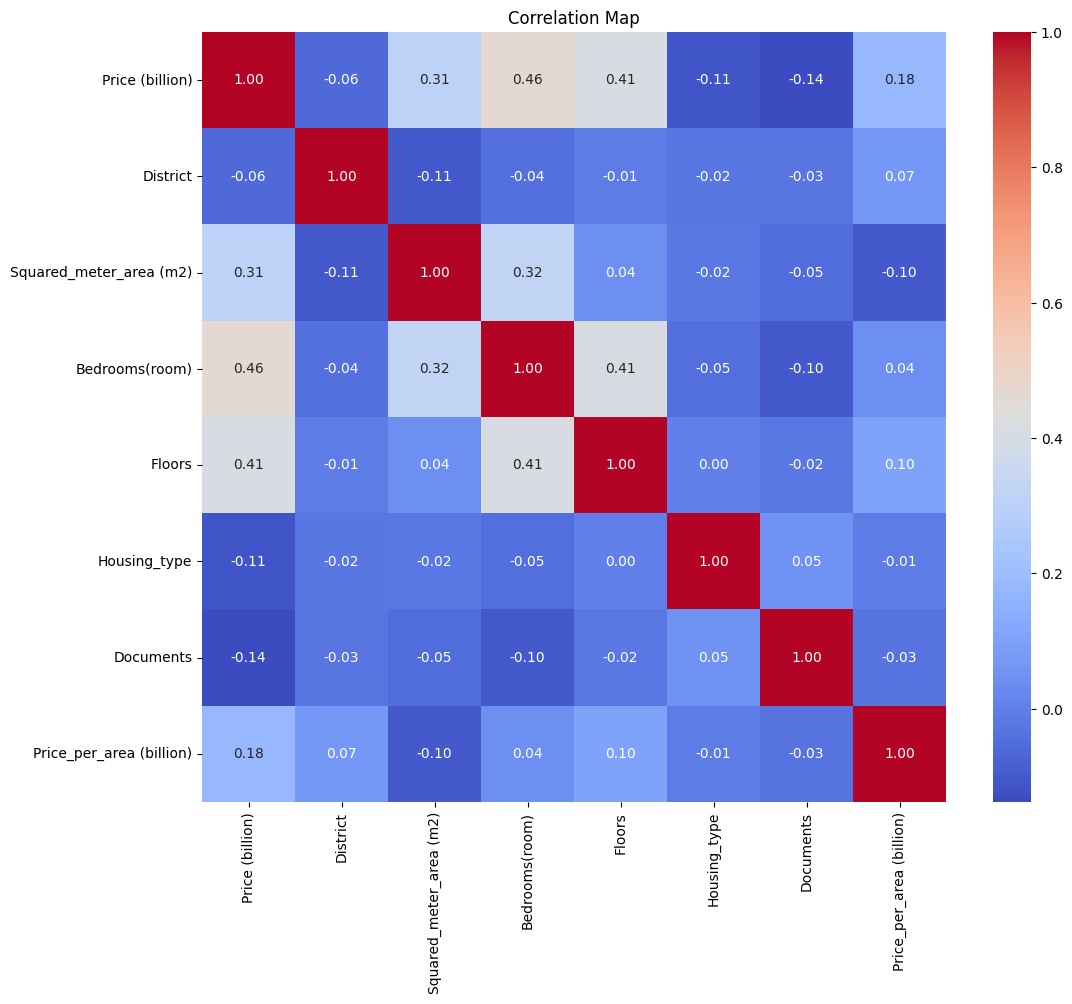

In [ ]:
# Change category data type
df['Documents'] = pd.factorize(df['Documents'])[0]
df['Housing_type'] = pd.factorize(df['Housing_type'])[0]
df['District'] = pd.factorize(df['District'])[0]

# Create correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map')
plt.show()

**Comment**

The factors that have the highest correlation to price are number of bedrooms and number of floors (0.46 and 0.41 respectively), indicating that a higher number of bedrooms and floors would lead to an increase in price. The other factors including squared meter area and price per area also have a positive correlation, though not significantly (only 0.31 and 0.18 respectively), to the price factor. District, document, and housing type turn out to express negative correlation scores in determining housing price.

## **Pairplot**

<Figure size 1200x1000 with 0 Axes>

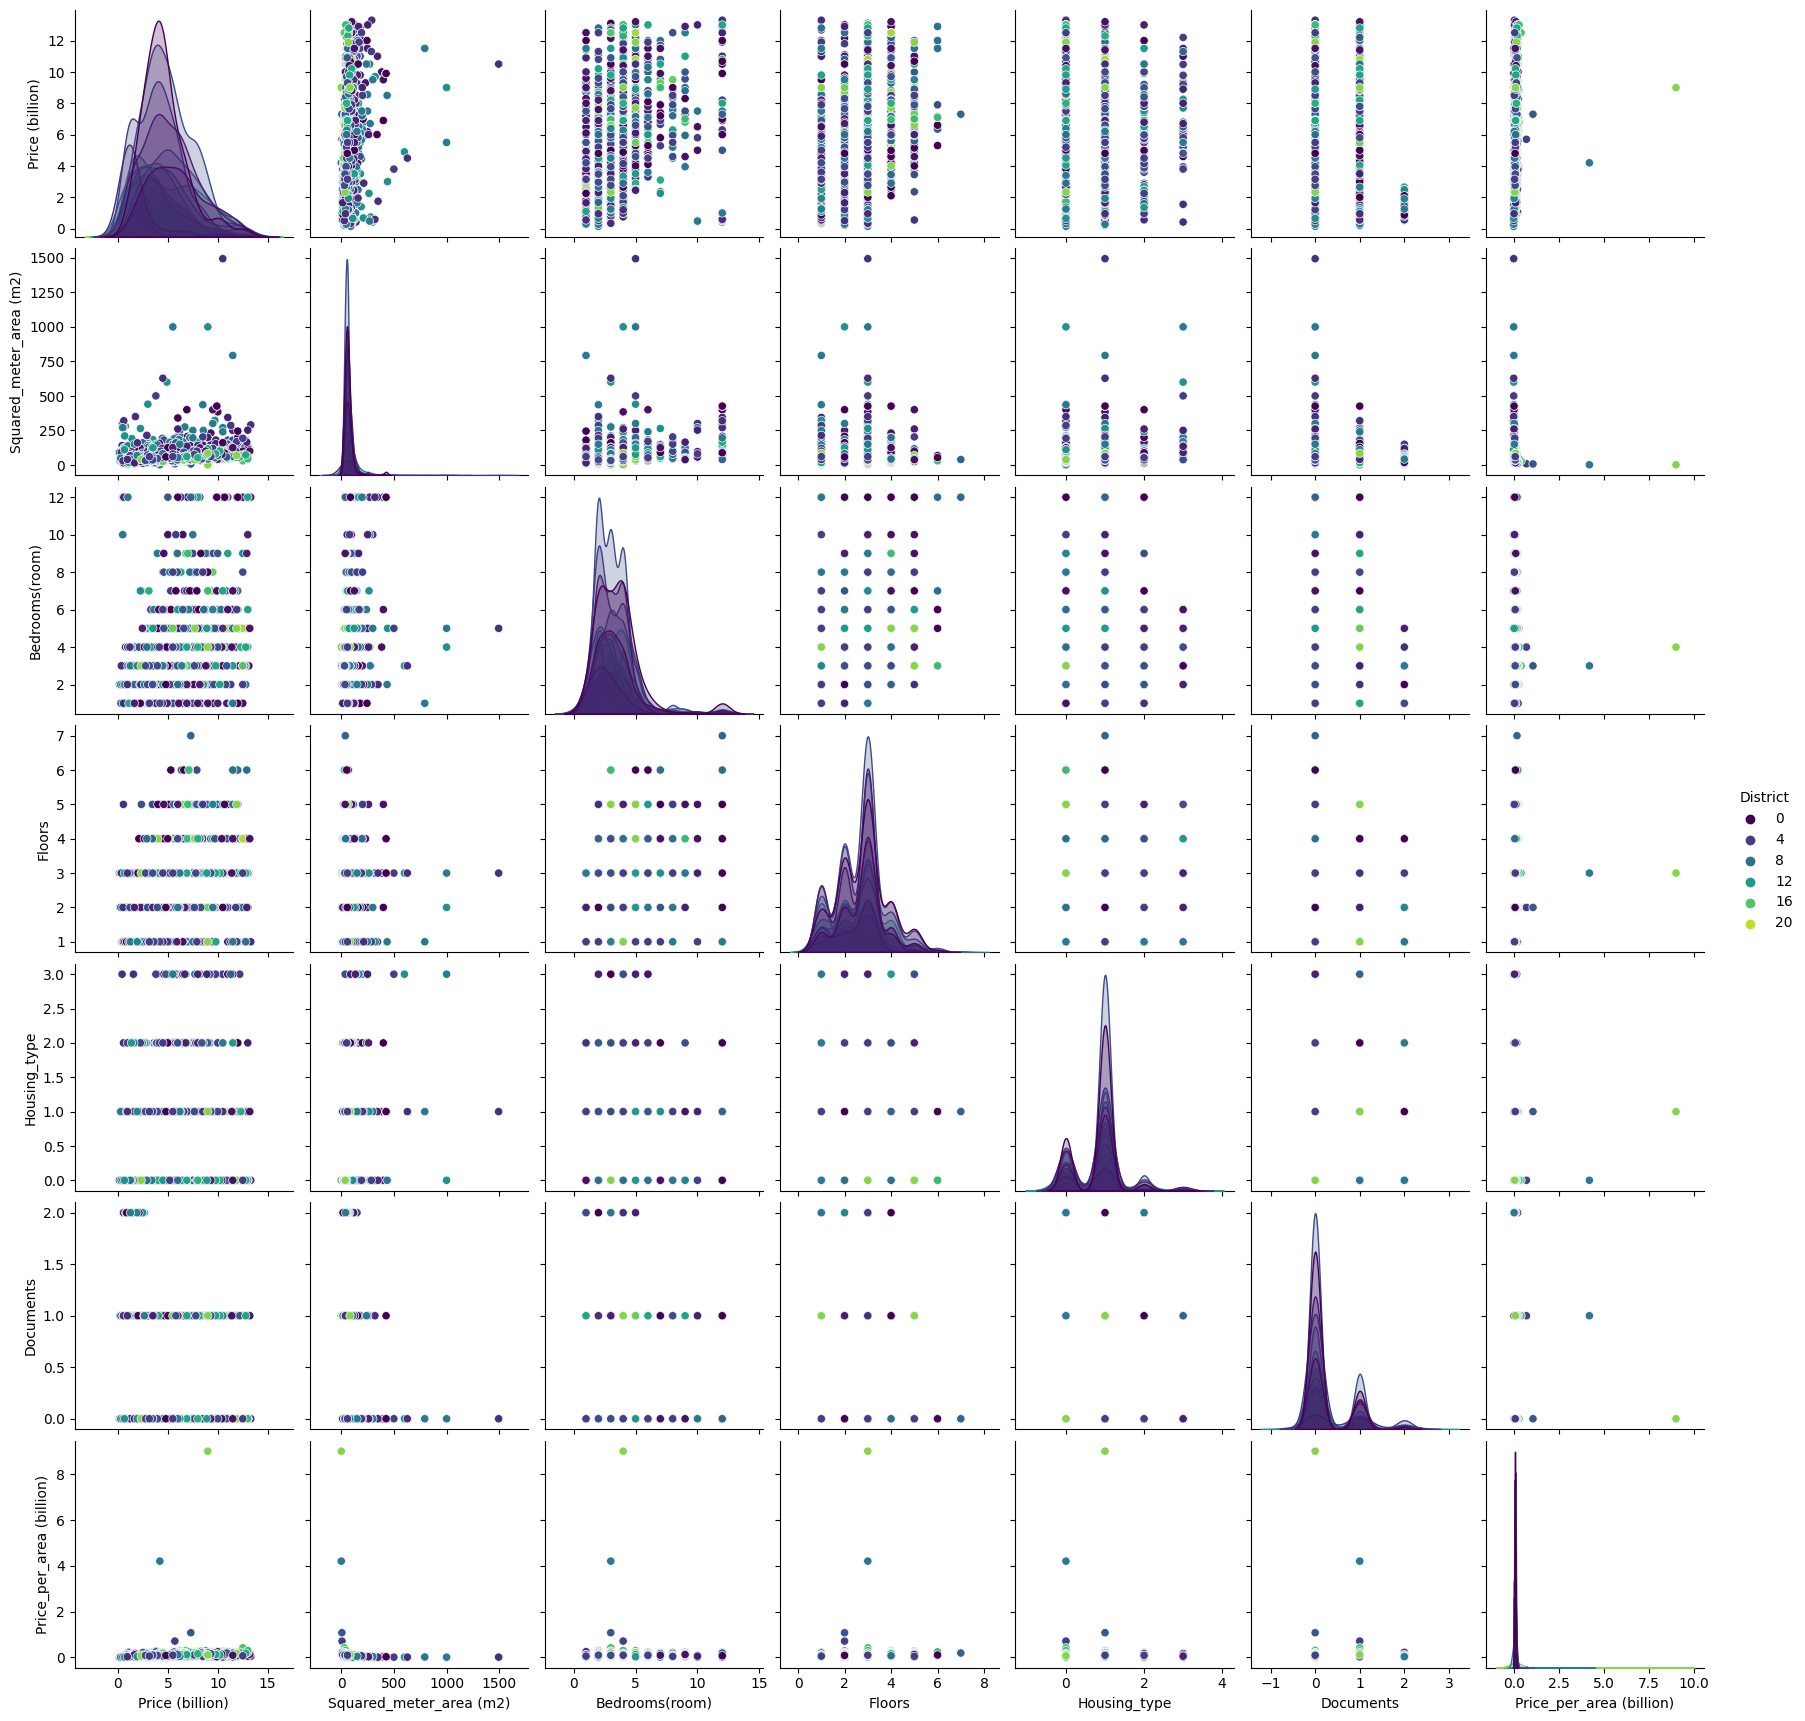

In [ ]:
# Pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='District', palette='viridis')
plt.show()

**Comments:**

It is seen that there is a slight upward trend, which indicates a positive relationship between price and squared meter area, price and price per area, bedrooms and squared meter area.



# **Question 2: Using Linear Regression in scikit-learn module to predict price of house**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
# import rmse
from keras.metrics import RootMeanSquaredError
from matplotlib import pyplot as plt
import numpy as np

In this step, we prepare the data for further analysis. Our tasks include changing texts to numerical data, including the following variables: documents, housing types, address, and district. We also drop some columns with standard deviation equal 0.

In [ ]:
# Read data from data_clean.csv
df = pd.read_csv('data_clean.csv', )
# change text to numberic value
df['Documents'] = pd.factorize(df['Documents'])[0]
df['Housing_type'] = pd.factorize(df['Housing_type'])[0]
df['Address'] = pd.factorize(df['Address'])[0]
df['District'] = pd.factorize(df['District'])[0]
# drop useless column
df.drop(['url', 'Ward', 'Address'], axis=1, inplace=True)
# show info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3569 entries, 0 to 3568
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Price (billion)           3569 non-null   float64
 1   District                  3569 non-null   int64  
 2   Squared_meter_area (m2)   3569 non-null   float64
 3   Bedrooms(room)            3569 non-null   int64  
 4   Floors                    3569 non-null   float64
 5   Housing_type              3569 non-null   int64  
 6   Documents                 3569 non-null   int64  
 7   Price_per_area (billion)  3569 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 223.2 KB


In [ ]:
# Change data type of datas from int64 to float64
df = df.astype("float64")

In [ ]:
# Drop columns with std = 0, meaning that
columns_have_std = (df.std() != 0.0).values.tolist()
df = df[df.columns[columns_have_std].values.tolist()]
df.head(10)

,Price (billion),District,Squared_meter_area (m2),Bedrooms(room),Floors,Housing_type,Documents,Price_per_area (billion)
0,7.490,0.0,80.0,3.0,1.0,0.0,0.0,0.093625
1,5.400,1.0,75.0,3.0,2.0,1.0,0.0,0.072000
2,11.500,2.0,84.0,5.0,3.0,2.0,1.0,0.136905
3,0.315,3.0,100.0,2.0,1.0,0.0,0.0,0.003150
4,6.280,4.0,98.0,3.0,3.0,0.0,0.0,0.064082
5,10.480,2.0,120.0,4.0,3.0,0.0,0.0,0.087333
6,5.700,4.0,62.0,4.0,3.0,2.0,0.0,0.091935
7,4.600,5.0,48.0,4.0,3.0,1.0,0.0,0.095833
8,4.900,6.0,40.0,4.0,4.0,1.0,0.0,0.122500
9,1.290,4.0,21.0,2.0,3.0,1.0,1.0,0.061429


In [ ]:
columns_to_standardize = df.drop(['Price (billion)'], axis=1).columns.values.tolist()

# Standarized data
scaled_df = standardize_data(df, columns_to_standardize)

In [ ]:
X = scaled_df.drop(['Price (billion)'], axis=1).values
y = scaled_df['Price (billion)'].values

### **Train our Model**
In this step, we start to train our predictive model by first dividing the dataset into 2 parts: one for training and one for testing. The dataset for training shall be used to generate our model.

In [ ]:
# 80% of the data is used for training while the rest 20% is used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=3)
print(f"Train:\nX shape: {X_train.shape}\ny shape: {y_train.shape}\n")
print(f"Test:\nX shape: {X_test.shape}\ny shape: {y_test.shape}")

Train:
X shape: (2855, 7)
y shape: (2855,)

Test:
X shape: (714, 7)
y shape: (714,)


In [ ]:
# Create a Linear Regression model
lr = LinearRegression()
# Fit the model into the training data
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
rmse = RootMeanSquaredError()
print("RMSE of linear regression: ", rmse(lr.predict(X_test), y_test).numpy())

RMSE of linear regression:  2.1346495


In [ ]:
param_types = df.drop(["Price (billion)"], axis=1).columns.values
print(f"Type of param: \n{param_types}\n\nWeight: \n{lr.coef_}\n\nBias: {lr.intercept_}")

Type of param: 
['District' 'Squared_meter_area (m2)' 'Bedrooms(room)' 'Floors'
 'Housing_type' 'Documents' 'Price_per_area (billion)']

Weight: 
[-0.11823833  0.59248599  0.72950293  0.73754987 -0.27038782 -0.21253994
  0.36793667]

Bias: 4.632786537498875


**Comment:**
- As we can see, square meter area, number of bedrooms, number of floors and price per area have a directly positive relationship with price as their co-efficients are positive.
- If the square meter area,  number of bedrooms, number of floors and price per area increase 1 unit, house price subsequently increases on average 0.592, 0.73, 0.738 and 0.368 billion respectively.
- The negative sign of housing type and documents indicates that when houses are considered to have legal documents, they have higher prices compared to houses that don't.

In [ ]:
order = (-np.abs(lr.coef_)).argsort()
print("Factors that influence price (In descending order): \n", param_types[order])

Factors that influence price (In descending order): 
 ['Floors' 'Bedrooms(room)' 'Squared_meter_area (m2)'
 'Price_per_area (billion)' 'Housing_type' 'Documents' 'District']


Text(0.5, 1.0, 'Feature importance degree')

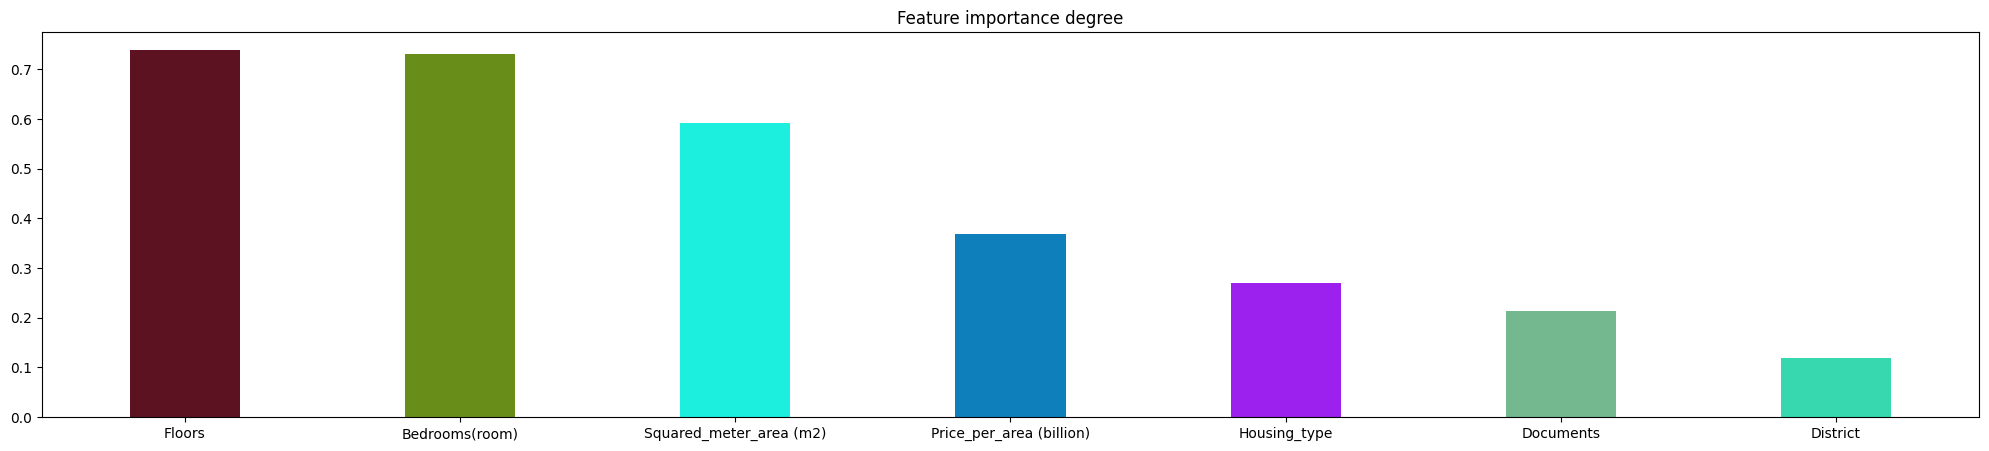

In [ ]:
# Feature importance
f = plt.figure(figsize=(25,5))
plt.bar(param_types[order], np.abs(lr.coef_)[order], width=0.4, color = np.random.rand(len(param_types),3))
plt.title("Feature importance degree")

In [ ]:
df_result = pd.DataFrame()
df_result["Predicted price"] = pd.Series(lr.predict(X_test))
df_result["True price"] = pd.Series(y_test)

Range of true price: 0.21 - 13.3
Range of predicted price: 0.9490064475788547 - 13.692254054542426


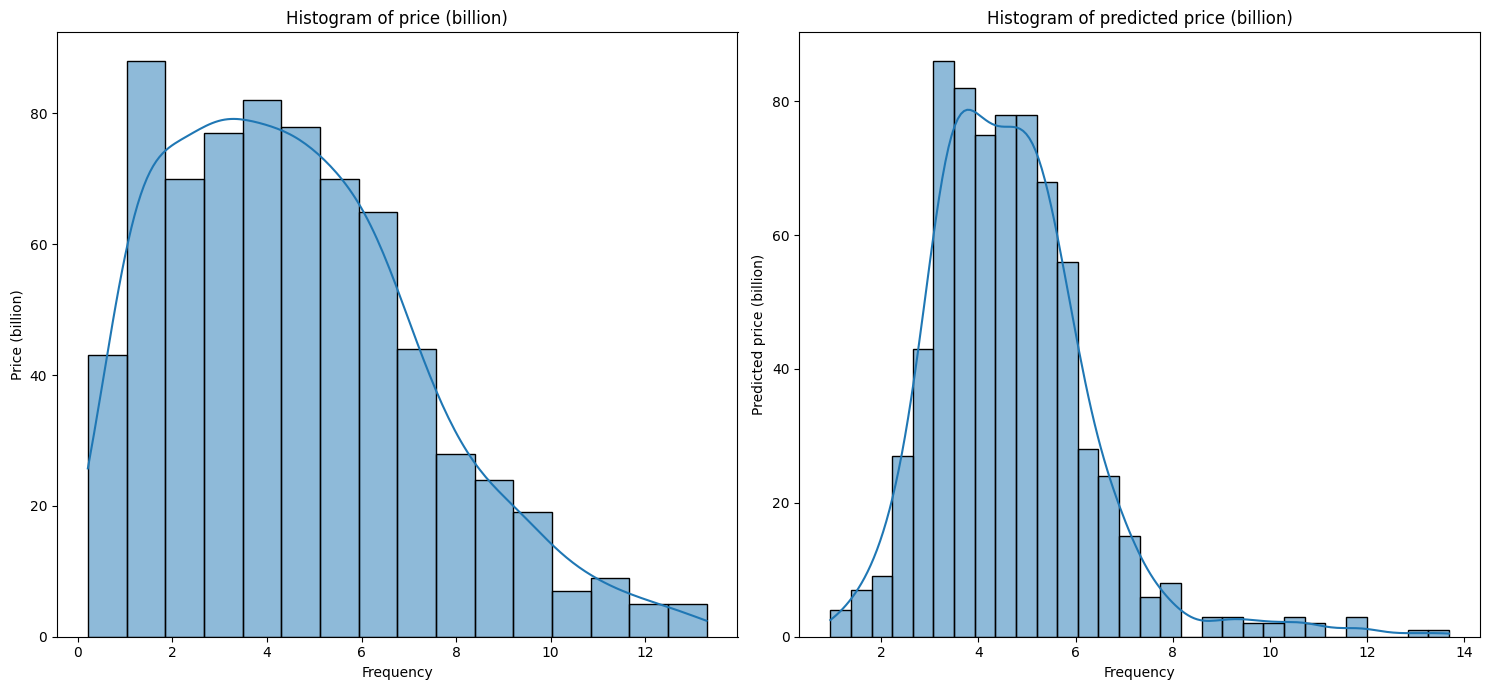

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print(f"Range of true price: {df_result['True price'].min()} - {df_result['True price'].max()}")
print(f"Range of predicted price: {df_result['Predicted price'].min()} - {df_result['Predicted price'].max()}")

# Plot Price and Predicted price histograms
f, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(df_result['True price'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of price (billion)')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Price (billion)')

sns.histplot(df_result['Predicted price'], kde=True, ax=axes[1])
axes[1].set_title('Histogram of predicted price (billion)')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Predicted price (billion)')

plt.tight_layout()
plt.show()

In [ ]:
df_result[['True price', "Predicted price"]]

,True price,Predicted price
0,1.75,4.727035
1,6.60,5.966172
2,2.20,3.764207
3,5.67,4.404799
4,4.30,3.842382
...,...,...
709,12.80,5.910286
710,1.20,3.333146
711,6.00,5.846101
712,4.35,6.059045


Text(0, 0.5, 'Price (billion)')

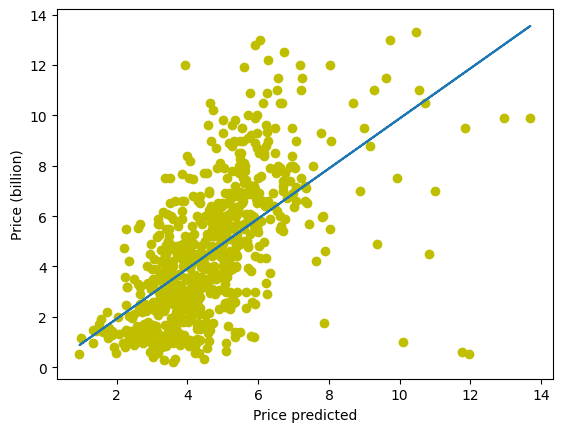

In [ ]:
coef = np.polyfit(df_result['Predicted price'], df_result['True price'], 1)
poly1d_fn = np.poly1d(coef)
plt.plot(df_result['Predicted price'], df_result['True price'], 'yo', df_result['Predicted price'], poly1d_fn(df_result['Predicted price']), '-')
plt.xlabel('Price predicted')
plt.ylabel('Price (billion)')

In [ ]:
print("Angle: ", np.arctan(poly1d_fn[1])*180/np.pi)

Angle:  44.838711817847575


**Comments:**

- This graph illustrates the accuracy of the predicted price compared with the actual price.
- The slope of the line, which is at 44.84. However, the data points scatter randomly and do not follow the trendline, which means undesirable price prediction.

# **Question 3: Random Forest**

Use Random Forest Regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

### **Preparing the Data**

We use the data from Question 2 to prepare the data for this part.


RandomForestRegressor have many parameters. It would to choose the best model with the best params set by GridSearchCV.

To more detail about RandomForestRegressor, access https://scikit-learn.org/0.15/modules/generated/sklearn.ensemble.RandomForestRegressor.html

We want to use Random Forest to predict price for HCM houses instead of Decision Tree Regression beacause Random Forest can avoid overfitting and underfitting problems when the model contains a forest of trees. It will predict the result based on Majority voting between each trees in the forest.

In [ ]:
# Grid of params to find best paramaters
RF_random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [int(x) for x in np.linspace(10, 100, num = 10)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

We will use random search to find the best parameters for the model:

*   n_estimators: number of tree, search from 100 to 1000 trees, step is 10
*   max_features: we do not expect to use all the variables in each trees because it may cause high correlation between trees, which will be against our goal is to create different trees to take the majority vote
*   max_depth: how deep for the tree in the forest to prevent bad predictions
*   min_samples_split: stop splitting to tree node when the data points in that node is less than or equal to min_samples_split
*   min_samples_leaf: minimum number of samples left of the leaf
*   bootstrap:
    - When bootstrap=True, it means that the Random Forest Regressor will use bootstrapping to create subsets of the training data for each tree in the ensemble. Bootstrapping is a random sampling with replacement technique, where each subset is created by randomly selecting data points from the original dataset, allowing some data points to be selected multiple times, while others might not be selected at all.
    - When bootstrap=False, it means that each tree in the Random Forest will be trained on the entire training dataset without bootstrapping, meaning that all data points are used for each tree.

In [ ]:
# Beginning to fit and find the best parameters
regressor = RandomForestRegressor()
random_search = RandomizedSearchCV(estimator=regressor, param_distributions=RF_random_grid, n_iter=100, cv=5,
                                      verbose=0, random_state=2022, n_jobs=-1).fit(X_train,y_train)
best_params = random_search.best_params_
best_params

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': True}

We use Randomized Search with Cross-validation to find the best parameters for the model. In the train dataset, we will split into 5 parts, 4 parts are used to train the model, 1 part left is used to validate the model with test parameters.

In [ ]:
param_grid = {'n_estimators': [best_params['n_estimators']-100, best_params['n_estimators'], best_params['n_estimators']+100],
               'max_depth': [best_params['max_depth'] - 10, best_params['max_depth'], best_params['max_depth']+10],
               'min_samples_split': [2, 10],
               'min_samples_leaf': [2, 5],
               'bootstrap': [True, False]}

But since we cannot ensure that theses pararmeter are actually the best parameters, we want to test again using Grid Search with Cross-validation, which will have similar mechanism. While Grid Search looks at every possible combination of parameters to find the best model, Random Search only selects and tests a random combination of parameters.

In [ ]:
regressor2 = RandomForestRegressor()
RF_grid_search = GridSearchCV(estimator=regressor2, param_grid=param_grid,
                              cv=3, n_jobs=-1, verbose=0).fit(X_train,y_train)

RF_grid_search.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1100}

**This is parameters we use for trainning Random Forest model: **

*   n_estimators: 1100
*   max_depth: 50
*   min_samples_split: 2
*   min_samples_leaf: 2
*   bootstrap: True


In [ ]:
regressor2 = RF_grid_search.best_estimator_
rmse = RootMeanSquaredError()
print("RMSE of random forest regression: ", rmse(regressor2.predict(X_test), y_test).numpy())

RMSE of random forest regression:  0.2713508


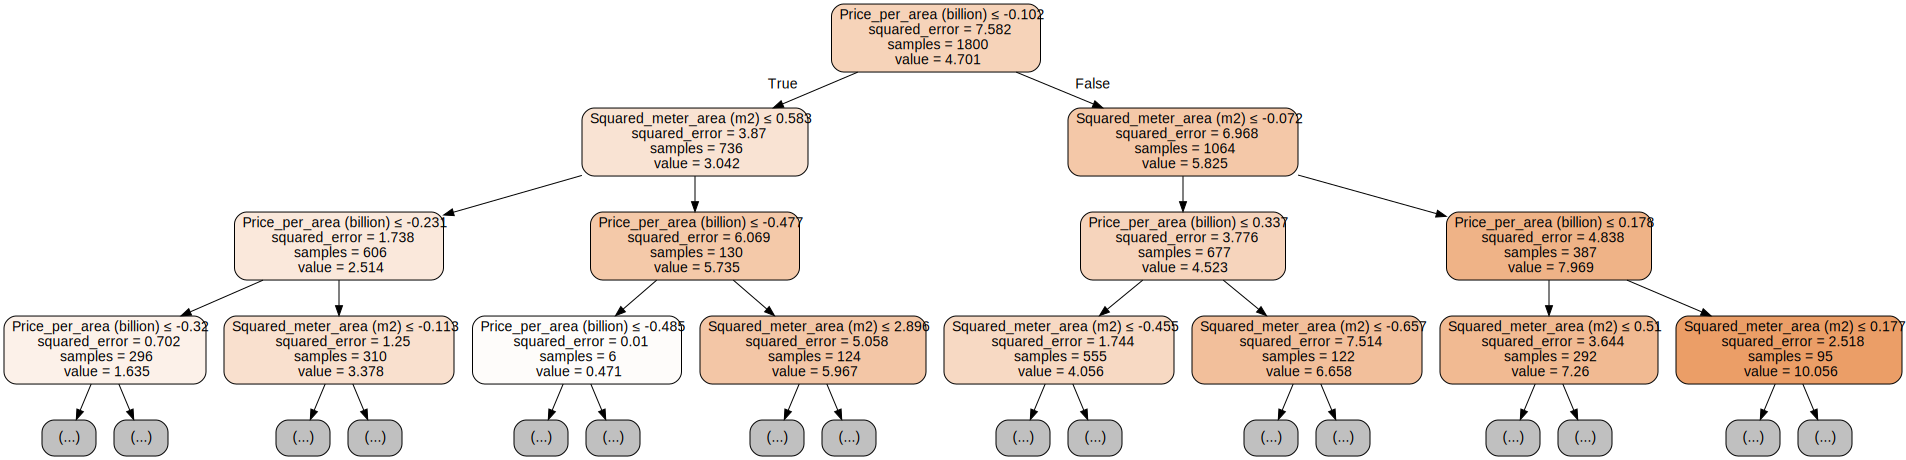

In [ ]:
#Visualize a decision tree
import graphviz
from sklearn import tree
fn = scaled_df.drop(['Price (billion)'], axis=1).columns.values
cn = ["Price (billion)"]

max_depth = 3
dot_data = tree.export_graphviz(regressor2.estimators_[0], out_file=None,
                        feature_names=fn,
                        class_names=cn,
                        filled=True, rounded=True,
                        max_depth = max_depth,
                        label='all',
                        special_characters=True)
graph = graphviz.Source(dot_data)
graph

There are many decision trees used in random forest methods (1100 are chosen to be constructed as mentioned). Above is just one decision tree among those.

The tree is built by splitting the data into smaller subsets based on a series of decision rules. Each node in the tree represents a decision. The data goes through the decision tree from the root node first. At each node, the value of the feature that is used to split the data is compared to the fixed value called threshold. If the value of the feature is less than or equal to the threshold, the data sample will turn to the left child node. Otherwise, it moves to the right child node until it reaches the leaf node in the end.

Looking at our decision tree, the max-depth is 50, which means there are 50 layers in the tree. Within each node, there are several following elements:
- Feature: feature that is used to split the data at the node
- Threshold: the value of the feature acts as a first benchmark used for splitting the data
- Squared error: the squared error of the data at the node, measuring how it fit the model
- Sample: number of data satisfy the conditions of feature, threshold and squared error
- Value: predicted value of the dependent variable.

For instance, as the best predictor, Price per area is the first attribute used for splitting the data. If the Price per area (billion) ≤ -0.102 (billions), it is directed to the left; otherwise, the right is opted. 1800 data is at the present at the beginning and the predicted values for those data is 4.701 billions. Next, the second node is split based on square per meter with the same decision rule, then consecutively followed by the other variables in the lower layers of the decision tree.

The independent variables will be tested on other Trees in the Forest as well, and the predicted price shall be calculated by the average value from all the Trees.

Text(0.5, 1.0, 'Feature importance degree')

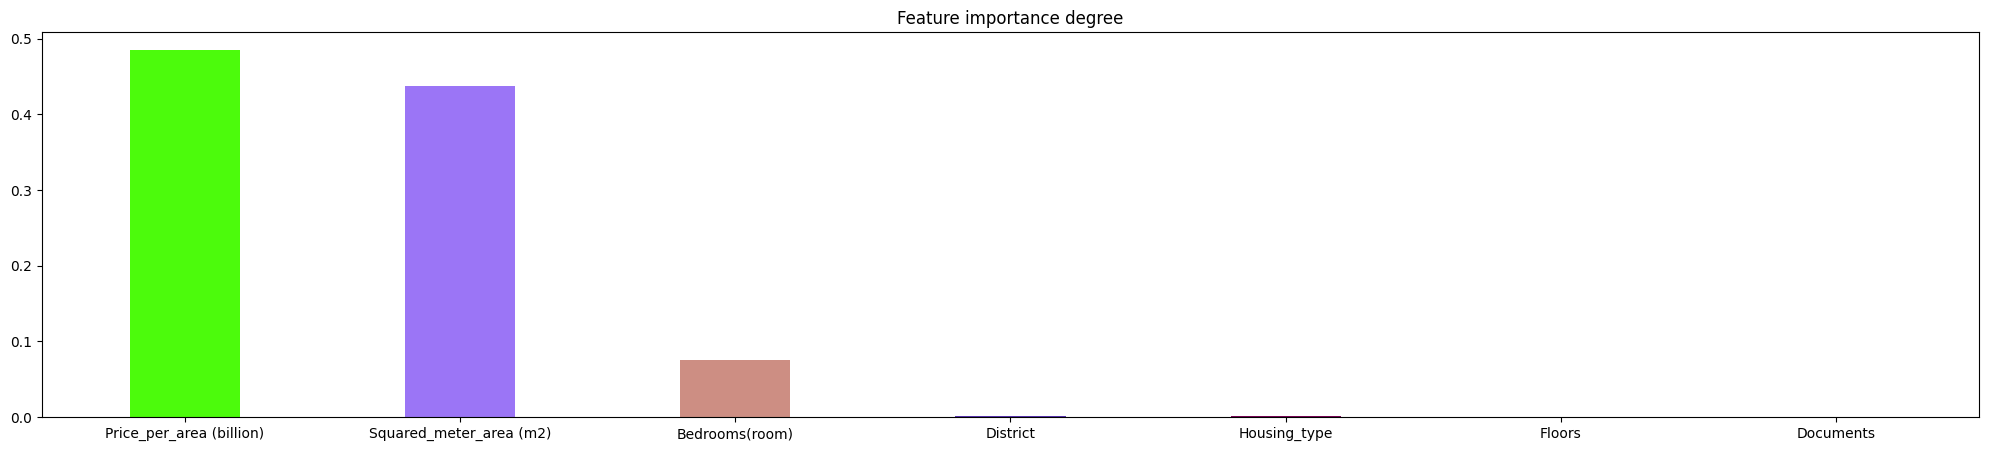

In [ ]:
order = (-regressor2.feature_importances_).argsort()
feature_names = scaled_df.drop(['Price (billion)'], axis=1).columns.values
f = plt.figure(figsize=(25,5))

plt.bar(feature_names[order], regressor2.feature_importances_[order], width=0.4, color = np.random.rand(len(param_types),3))
plt.title("Feature importance degree")

In [ ]:
df_result = pd.DataFrame()
df_result["Predicted price"] = pd.Series(regressor2.predict(X_test))
df_result["True price"] = pd.Series(y_test)

Range of true price: 0.21 - 13.3
Range of predicted price: 0.3569998863636371 - 12.653733105783125


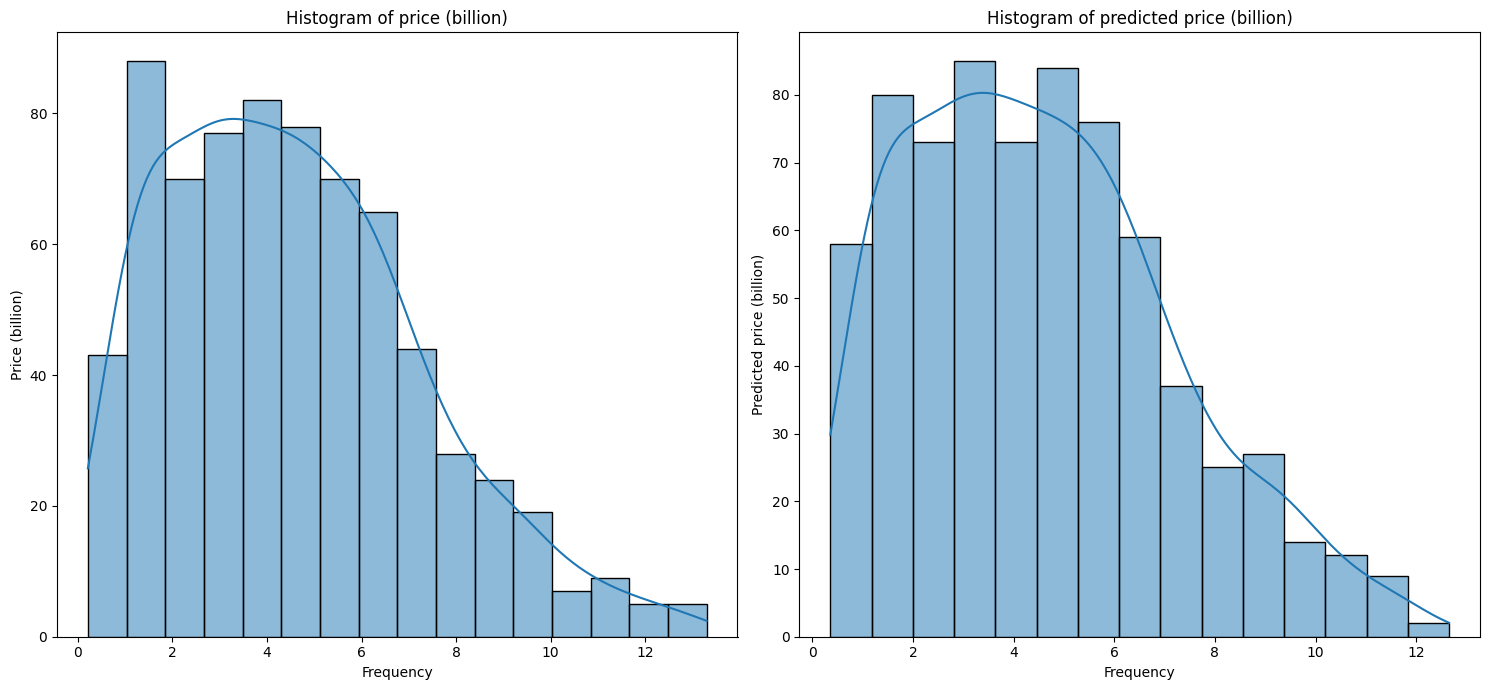

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print(f"Range of true price: {df_result['True price'].min()} - {df_result['True price'].max()}")
print(f"Range of predicted price: {df_result['Predicted price'].min()} - {df_result['Predicted price'].max()}")

f, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(df_result['True price'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of price (billion)')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Price (billion)')

sns.histplot(df_result['Predicted price'], kde=True, ax=axes[1])
axes[1].set_title('Histogram of predicted price (billion)')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Predicted price (billion)')

plt.tight_layout()
plt.show()

The Histogram of the Predicted Price bears much more similarity to the Histogram of the Real Price under Random Forest than under Linear Regression.

In [ ]:
df_result[['True price', "Predicted price"]]

,True price,Predicted price
0,1.75,1.799283
1,6.60,6.788983
2,2.20,2.233332
3,5.67,5.686219
4,4.30,4.306020
...,...,...
709,12.80,11.401545
710,1.20,1.160631
711,6.00,6.047788
712,4.35,4.334673


Text(0, 0.5, 'Price (billion)')

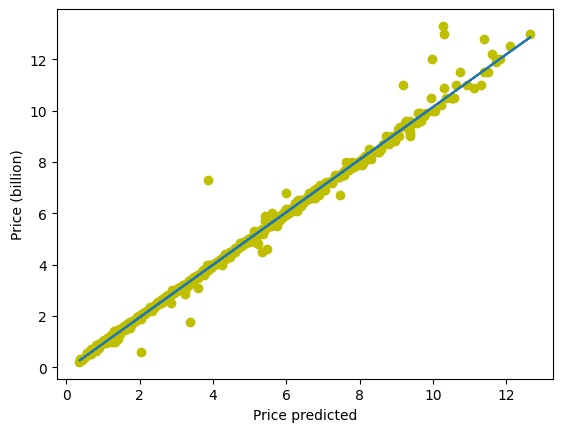

In [ ]:
coef = np.polyfit(df_result['Predicted price'], df_result['True price'], 1)
poly1d_fn = np.poly1d(coef)
plt.plot(df_result['Predicted price'], df_result['True price'], 'yo', df_result['Predicted price'], poly1d_fn(df_result['Predicted price']), '-')
plt.xlabel('Price predicted')
plt.ylabel('Price (billion)')

In [ ]:
print("Angle: ", np.arctan(poly1d_fn[1])*180/np.pi)

Angle:  45.69380806042518


The slope of this figure is at 45.7 degree, and most of the data points are positioned closely along the line. This indicates that this model is more effective in predicting real housing prices, with higher accuracy.

# **Question 4: Comparison**

To assess the efficiency of the two models, let's look at the yielded results.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
def root_mean_squared_error(predited_y,true_y):
    return mean_squared_error(predited_y,true_y, squared=False)
def r2_adj(predited_y,true_y):
    r2 =r2_score(predited_y, true_y)
    n = X_test.shape[0]
    p = X_test.shape[1]
    return 1-(1-r2)*(n-1)/(n-p-1)

In [ ]:
metrics = {"RMSE": root_mean_squared_error, "MSE": mean_squared_error, "MAE": mean_absolute_error, "R2": r2_score, "Adjusted R2": r2_adj}
records = {'Metric': [],
          'Random Forest (train)': [],
          'Linear Regession (train)': [],
          'Random Forest (test)': [],
          'Linear Regession (test)': []}

for metric in metrics.keys():
    records['Metric'].append(metric)
    # Train
    rdr = metrics[metric](regressor2.predict(X_train), y_train)
    linear = metrics[metric](lr.predict(X_train), y_train)
    records['Random Forest (train)'].append(rdr)
    records['Linear Regession (train)'].append(linear)
    # Test
    rdr = metrics[metric](regressor2.predict(X_test), y_test)
    linear = metrics[metric](lr.predict(X_test), y_test)
    records['Random Forest (test)'].append(rdr)
    records['Linear Regession (test)'].append(linear)
table = pd.DataFrame(records)
table

,Metric,Random Forest (train),Linear Regession (train),Random Forest (test),Linear Regession (test)
0,RMSE,0.143903,2.197499,0.271351,2.134649
1,MSE,0.020708,4.829001,0.073631,4.556728
2,MAE,0.041437,1.627075,0.086777,1.614660
3,R2,0.997115,-0.887122,0.989193,-0.685992
4,Adjusted R2,0.997087,-0.905833,0.989085,-0.702709


Understanding metrics:


*   𝑅^2: This metric measures the linear relationship between X and Y. It represents the proportion of the variance in the dependent variable that can be forecasted based on the independent variable.
*   Adjusted 𝑅^2: Adjusted R-squared compares the explanatory capability of regression models with varying numbers of predictors.
*   MAE: It calculates the mean of the absolute value of the errors. This metric measures the difference between two continuous variables, specifically the actual and predicted values of y.
*   MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.
*   RMSE (Root Mean Square Error) measures the square root of the average of the squared differences between predicted and actual values, providing a comprehensive assessment of prediction accuracy.

From the table above, RMSE, MSE and MAE of random forest are lower than those of linear regression in both train and test dataset. Low values of these metrics suggest that there are relatively low errors between the predicted and actual house price.

In terms of linear regression, its R squared and absolute R squared is reported to be negative in two cases. According to *sklearn.metrics*, R squared and absolute R squared can have minus sign if the model is arbitrarily worse. With regard to random forest, this model shows that its predictions match the real results.


# **Conclusion**

*   Under random forest, our exploration revealed that price per area, squared meter area, number of bedroom have significant impacts on housing price.

*   Properties with documents available exhibit slightly higher prices when compared to those waiting documents, although the difference is relatively small

*   We observed that property types such as "Nhà Biệt Thự" and "Nhà mặt phố, mặt tiền" tend to command higher prices in comparison to "Nhà phố liền kề" and "Nhà ngõ, hẻm."

*   Random forest is more reliable than linear regression in prediciting house prices.

# **Future work**
*   R squared is high, which implies that random forest model may be overfitting to some dataset due to the presence of some insignificant variable in our predictive model. That should need further research and modification in the future.

*   It is possible to find out the effects of some other factors such as nearby public utilities, year of construction, level of security, etc on HCM City house prices.

# **Reference**
https://renanmf.com/exploratory-data-analysis-house-prices-part-one/

https://www.kaggle.com/code/shreayan98c/boston-house-price-prediction

https://www.kaggle.com/code/xingobar/house-price-data-visualization

https://www.kaggle.com/code/gaganmaahi224/house-price-72-accuracy-eda-visualization?fbclid=IwAR32thyQOj_ukehip3AAsSyvjtJ_U7-puGeXa5Bbw7TU9Nxu1SvRIdI5IkE

https://www.kaggle.com/code/ashydv/housing-price-prediction-linear-regression
